In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import re
import keras
import os

2024-01-06 15:29:19.781439: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-06 15:29:19.803460: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-06 15:29:19.803478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-06 15:29:19.804068: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-06 15:29:19.807739: I tensorflow/core/platform/cpu_feature_guar

In [2]:
from keras.preprocessing import image

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

label_list = [1, 2, 3, 4, 5, 6, 0, 0, 0, 0]
def load_images_from_path(path):
    images = []
    labels = []

    # there is probably a cleaner way to do this but I am not willing to rename all the files
    i = 0
    path_ar = os.listdir(path)
    path_ar.sort(key=natural_keys)
    print(path_ar)
    for file in path_ar:
        if i % 10 == 0:
            i = 0
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label_list[i]))
        i += 1
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x_a = []
x_b = []
x_c = []
y = []

In [3]:
images, labels = load_images_from_path('./data/a_png')
x_a += images
y += labels
images, _ = load_images_from_path('./data/b_png')
x_b += images
images, _ = load_images_from_path('./data/c_png')
x_c += images


['rec_0_a_1.png', 'rec_1_a_1.5.png', 'rec_2_a_2.png', 'rec_3_a_2.5.png', 'rec_4_a_3.png', 'rec_5_a_3.5.png', 'rec_6_a_4.png', 'rec_7_a_4.png', 'rec_8_a_4.png', 'rec_9_a_4.png', 'rec_10_a_1.png', 'rec_11_a_1.5.png', 'rec_12_a_2.png', 'rec_13_a_2.5.png', 'rec_14_a_3.png', 'rec_15_a_3.5.png', 'rec_16_a_4.png', 'rec_17_a_4.png', 'rec_18_a_4.png', 'rec_19_a_4.png', 'rec_20_a_1.png', 'rec_21_a_1.5.png', 'rec_22_a_2.png', 'rec_23_a_2.5.png', 'rec_24_a_3.png', 'rec_25_a_3.5.png', 'rec_26_a_4.png', 'rec_27_a_4.png', 'rec_28_a_4.png', 'rec_29_a_4.png', 'rec_30_a_1.png', 'rec_31_a_1.5.png', 'rec_32_a_2.png', 'rec_33_a_2.5.png', 'rec_34_a_3.png', 'rec_35_a_3.5.png', 'rec_36_a_4.png', 'rec_37_a_4.png', 'rec_38_a_4.png', 'rec_39_a_4.png', 'rec_40_a_1.png', 'rec_41_a_1.5.png', 'rec_42_a_2.png', 'rec_43_a_2.5.png', 'rec_44_a_3.png', 'rec_45_a_3.5.png', 'rec_46_a_4.png', 'rec_47_a_4.png', 'rec_48_a_4.png', 'rec_49_a_4.png', 'rec_50_a_1.png', 'rec_51_a_1.5.png', 'rec_52_a_2.png', 'rec_53_a_2.5.png', 're

In [4]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_a_train, x_a_test, x_b_train, x_b_test, x_c_train, x_c_test, y_train, y_test = train_test_split(x_a, x_b, x_c, y, stratify=y, test_size=0.2, random_state=42)

# normalize
x_a_train_norm = np.array(x_a_train) / 255
x_a_test_norm = np.array(x_a_test) / 255
x_b_train_norm = np.array(x_b_train) / 255
x_b_test_norm = np.array(x_b_test) / 255
x_c_train_norm = np.array(x_c_train) / 255
x_c_test_norm = np.array(x_c_test) / 255

# categorize
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [5]:
x_a_train_norm.shape

(96, 224, 224, 3)

In [6]:
# multi input cnn
from keras.models import Model

input_a = keras.Input(shape=(224, 224, 3))
input_b = keras.Input(shape=(224, 224, 3))
input_c = keras.Input(shape=(224, 224, 3))

conv1_a = keras.layers.Conv2D(64, (3, 3), activation='relu')(input_a)
pool1_a = keras.layers.MaxPooling2D((2, 2))(conv1_a)

conv1_b = keras.layers.Conv2D(64, (3, 3), activation='relu')(input_b)
pool1_b = keras.layers.MaxPooling2D((2, 2))(conv1_b)

conv1_c = keras.layers.Conv2D(64, (3, 3), activation='relu')(input_c)
pool1_c = keras.layers.MaxPooling2D((2, 2))(conv1_c)

conv2_a = keras.layers.Conv2D(128, (3, 3), activation='relu')(pool1_a)
pool2_a = keras.layers.MaxPooling2D((2, 2))(conv2_a)

conv2_b = keras.layers.Conv2D(128, (3, 3), activation='relu')(pool1_b)
pool2_b = keras.layers.MaxPooling2D((2, 2))(conv2_b)

conv2_c = keras.layers.Conv2D(128, (3, 3), activation='relu')(pool1_c)
pool2_c = keras.layers.MaxPooling2D((2, 2))(conv2_c)

# conv3_a = keras.layers.Conv2D(128, (3, 3), activation='relu')(pool2_a)
# pool3_a = keras.layers.MaxPooling2D((2, 2))(conv3_a)

# conv3_b = keras.layers.Conv2D(128, (3, 3), activation='relu')(pool2_b)
# pool3_b = keras.layers.MaxPooling2D((2, 2))(conv3_b)

# conv3_c = keras.layers.Conv2D(128, (3, 3), activation='relu')(pool2_c)
# pool3_c = keras.layers.MaxPooling2D((2, 2))(conv3_c)

flat_a = keras.layers.Flatten()(pool2_a)
flat_b = keras.layers.Flatten()(pool2_b)
flat_c = keras.layers.Flatten()(pool2_c)

concat = keras.layers.concatenate([flat_a, flat_b, flat_c])

dense1 = keras.layers.Dense(128, activation='relu')(concat)
dense2 = keras.layers.Dense(64, activation='relu')(dense1)
output = keras.layers.Dense(7, activation='softmax')(dense2)

model = keras.Model(inputs=[input_a, input_b, input_c], outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 222, 222, 64)         1792      ['input_1[0][0]']             
                                                                                              

2024-01-06 15:29:24.127761: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-06 15:29:24.144425: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-06 15:29:24.144522: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

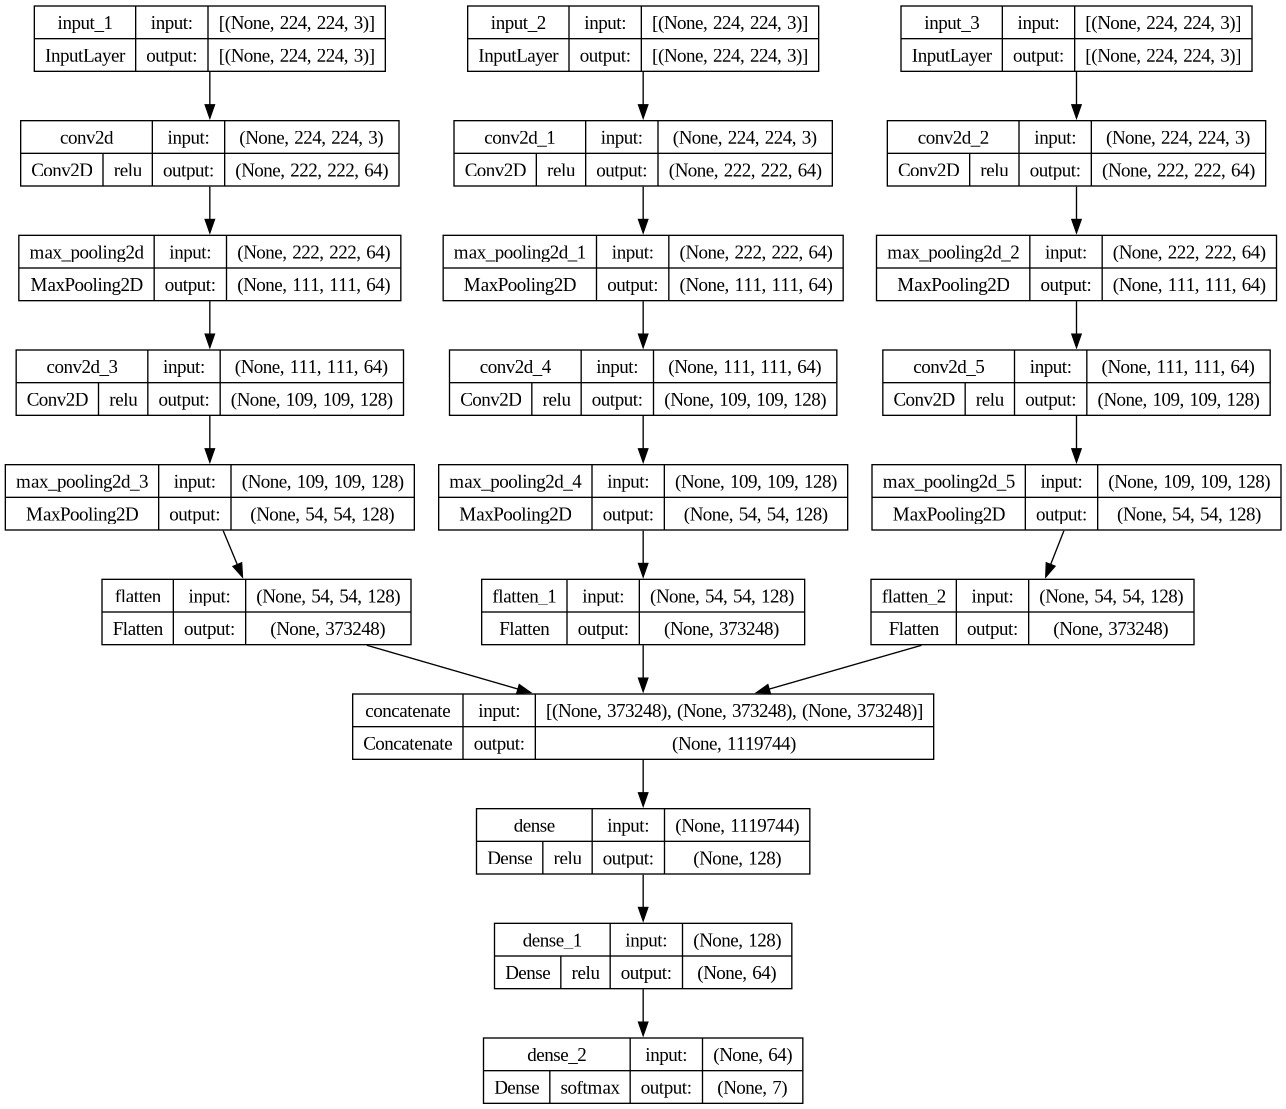

In [7]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True, show_layer_activations=True)

In [8]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit([x_a_train_norm, x_b_train_norm, x_c_train_norm], y_train, epochs=35, batch_size=32, validation_split=0.1)
test_scores = model.evaluate([x_a_test_norm, x_b_test_norm, x_c_test_norm], y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/35


2024-01-06 15:29:25.389379: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-01-06 15:29:25.836174: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 939.37MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-06 15:29:26.267938: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 939.37MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-06 15:29:26.307311: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 939.37MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there co

2/3 [===================>..........] - ETA: 0s - loss: 2.5110 - accuracy: 0.3125 

2024-01-06 15:29:31.631731: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 939.37MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-06 15:29:31.651058: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 939.37MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


3/3 [==============================] - 11s 2s/step - loss: 2.6148 - accuracy: 0.3256 - val_loss: 2.4854 - val_accuracy: 0.0000e+00
Epoch 2/35
3/3 [==============================] - 1s 226ms/step - loss: 1.9326 - accuracy: 0.2791 - val_loss: 1.5971 - val_accuracy: 0.5000
Epoch 3/35
3/3 [==============================] - 1s 227ms/step - loss: 1.7404 - accuracy: 0.3837 - val_loss: 1.6979 - val_accuracy: 0.6000
Epoch 4/35
3/3 [==============================] - 1s 226ms/step - loss: 1.7365 - accuracy: 0.3605 - val_loss: 1.7422 - val_accuracy: 0.5000
Epoch 5/35
3/3 [==============================] - 1s 224ms/step - loss: 1.5905 - accuracy: 0.3837 - val_loss: 1.6998 - val_accuracy: 0.5000
Epoch 6/35
3/3 [==============================] - 1s 225ms/step - loss: 1.5861 - accuracy: 0.3837 - val_loss: 1.8070 - val_accuracy: 0.5000
Epoch 7/35
3/3 [==============================] - 1s 226ms/step - loss: 1.5134 - accuracy: 0.4419 - val_loss: 1.7666 - val_accuracy: 0.5000
Epoch 8/35
3/3 [=============

2024-01-06 15:29:59.818066: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 939.37MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-06 15:29:59.827832: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 939.37MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-06 15:30:00.115799: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 939.37MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1/1 - 2s - loss: 1.9636 - accuracy: 0.5417 - 2s/epoch - 2s/step
Test loss: 1.9635595083236694
Test accuracy: 0.5416666865348816


In [11]:
model.save("model.keras")

[]

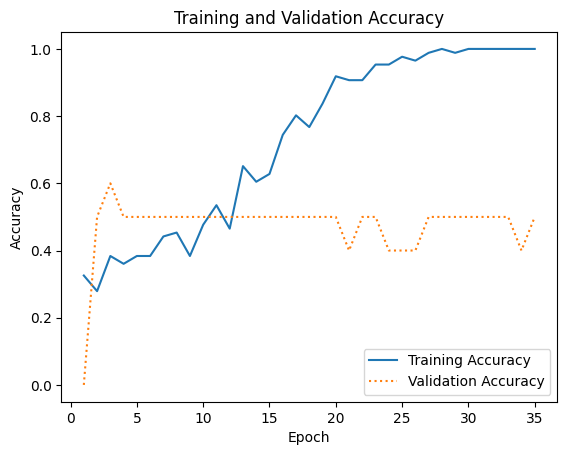

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()